In [1]:

%matplotlib widget
import matplotlib.pyplot as plt
from polygonal_roadmaps import polygonal_roadmap
import networkx as nx
import numpy as np
import logging
import pandas as pd
import seaborn as sns
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import tempfile

# logging.getLogger().setLevel(logging.INFO)

%load_ext snakeviz

In [2]:
%%snakeviz
ex = polygonal_roadmap.make_run(n_agents=15, profiling=False)

steps in history: 54
 
*** Profile stats marshalled to file '/var/folders/f5/7kx8kghx2_722736y_vzg_cm0000gn/T/tmpf1g2y1ch'. 
Embedding SnakeViz in this document...


In [3]:
from plotnine import *
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')

In [4]:
data = []
image = ex.env.get_background_matrix()
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        data.append((x, y, image[y, x]))
df_obstacles = pd.DataFrame(data, columns=["x", "y", "value"])
df_obstacles["occupied"] = df_obstacles.value.eq(1)
df = ex.get_history_as_dataframe()

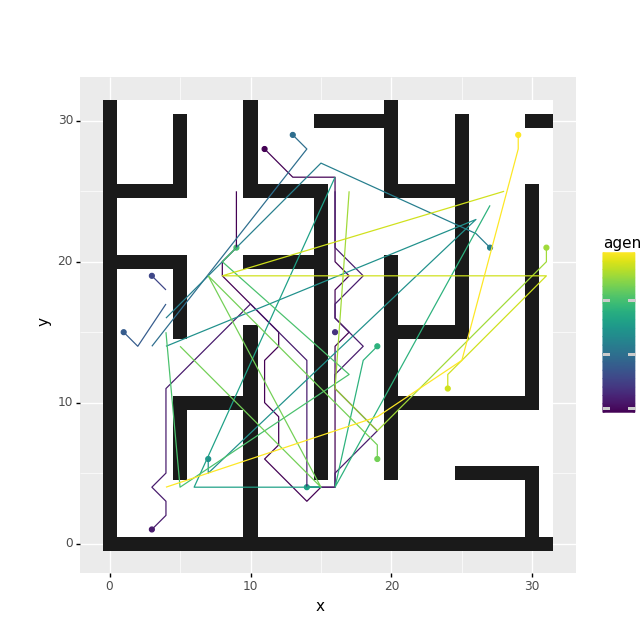

<ggplot: (327663047)>

In [5]:
def plot_timestep(t):
    return ggplot(df_obstacles, aes(x="x", y="y")) + geom_tile(aes(fill="occupied")) + guides(fill=None) + scale_fill_gray(start=0.1, end=1) + geom_point(df.loc[df.t.eq(t)], aes(x="x", y="y", color="agent")) + geom_path(df, aes(x="x", y="y", color="agent",group="agent")) + coord_fixed(ratio=1)
plot_timestep(0)

In [6]:
# It is better to use a generator instead of a list
plots = (plot_timestep(k) for k in df.t.unique())
ani = PlotnineAnimation(plots, interval=200, repeat_delay=500)
# ani.save('/tmp/animation.mp4')
ani

In [7]:
ex.history

[[(11, 28),
  (3, 1),
  (16, 15),
  (3, 19),
  (1, 15),
  (13, 29),
  (27, 21),
  (7, 6),
  (14, 4),
  (19, 14),
  (9, 21),
  (19, 6),
  (31, 21),
  (24, 11),
  (29, 29)],
 ((12, 27),
  (4, 2),
  None,
  (4, 18),
  (2, 14),
  (14, 28),
  (26, 22),
  (7, 5),
  (15, 4),
  (18, 13),
  (8, 20),
  (19, 7),
  (31, 20),
  (24, 12),
  (29, 28)),
 ((13, 26),
  (4, 3),
  None,
  None,
  (4, 17),
  (3, 14),
  (15, 27),
  (26, 23),
  (6, 4),
  (16, 4),
  (17, 12),
  (7, 19),
  (19, 8),
  (31, 19),
  (25, 13)),
 ((14, 26),
  (3, 4),
  None,
  None,
  None,
  None,
  (4, 16),
  (4, 14),
  (16, 26),
  (27, 24),
  (5, 4),
  (15, 4),
  (16, 11),
  (8, 19),
  (19, 9)),
 ((15, 26),
  (4, 5),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  (4, 15),
  (5, 14),
  (17, 25),
  (28, 25),
  (4, 4)),
 ((16, 26),
  (4, 6),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 ((16, 25),
  (4, 7),
  None,
  None,
  None,
  None,
  None,
  None,
